Lecture 96 - The Base Code

In [1]:
import networkx as nx
G=nx.erdos_renyi_graph(10,0.5)
nx.write_gml(G,'random_graph.gml')


Nodes in the graph: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


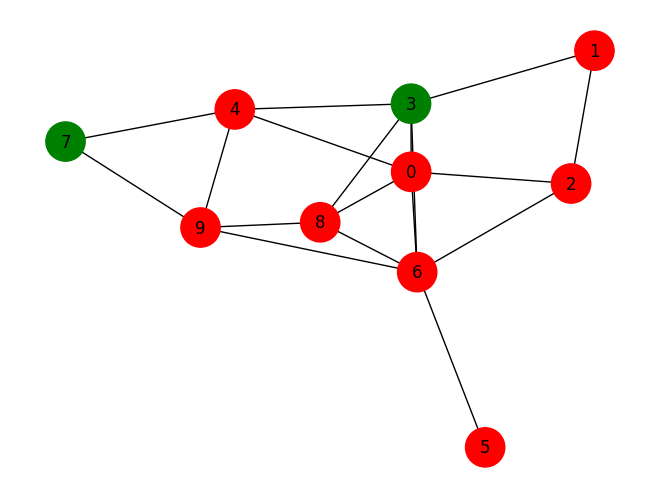

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

def set_all_to_B(G):
    # Set default action to 'B' for all nodes
    for node in G.nodes():
        G.nodes[node]['action'] = 'B'

def set_A(G, list1):
    # Set action to 'A' for nodes specified in list1
    for each in list1:
        if each in G.nodes():  # Check if the node exists in the graph
            G.nodes[each]['action'] = 'A'
        else:
            print(f"Node {each} not found in the graph.")  # Notify if node is missing

def get_colors(G):
    # Assign colors based on action
    colors = []
    for each in G.nodes():
        if 'action' in G.nodes[each] and G.nodes[each]['action'] == 'A':
            colors.append('green')  # Color for action 'A'
        else:
            colors.append('red')  # Color for action 'B'
    return colors

# Load the graph from a GML file
G = nx.read_gml('random_graph.gml')

# Print the nodes to check if they exist
print("Nodes in the graph:", list(G.nodes()))

# Set all nodes to action 'B'
set_all_to_B(G)

# Specify nodes to set action 'A'
list1 = ['3', '7']
set_A(G, list1)

# Get the colors based on actions
colors = get_colors(G)

# Draw the graph with specified node colors
nx.draw(G, node_color=colors, node_size=800, with_labels=True)

plt.show()


Nodes in the graph: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


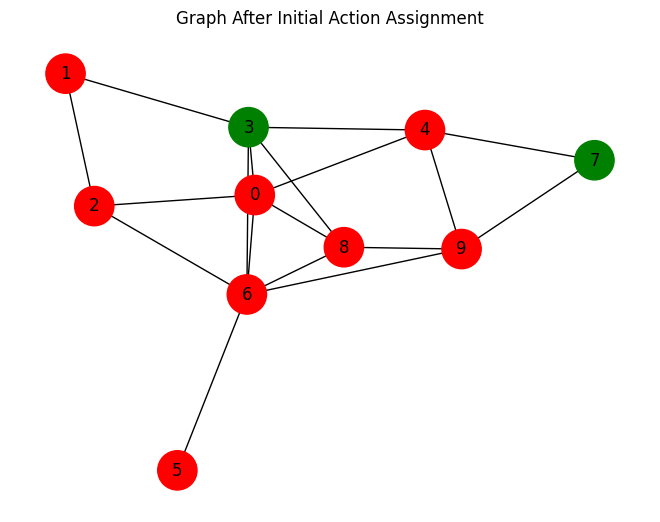

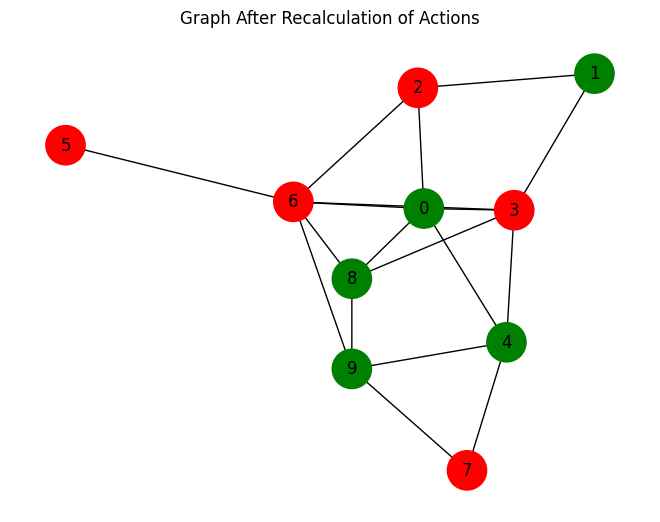

In [36]:
import networkx as nx
import matplotlib.pyplot as plt

def set_all_to_B(G):
    # Set default action to 'B' for all nodes
    for node in G.nodes():
        G.nodes[node]['action'] = 'B'

def set_A(G, list1):
    # Set action to 'A' for nodes specified in list1
    for each in list1:
        if each in G.nodes():  # Check if the node exists in the graph
            G.nodes[each]['action'] = 'A'
        else:
            print(f"Node {each} not found in the graph.")  # Notify if node is missing

def get_colors(G):
    # Assign colors based on action
    colors = []
    for each in G.nodes():
        if 'action' in G.nodes[each] and G.nodes[each]['action'] == 'A':
            colors.append('green')  # Color for action 'A'
        else:
            colors.append('red')  # Color for action 'B'
    return colors

def find_neigh(each, c, G):
    num = 0
    for neighbor in G.neighbors(each):
        if G.nodes[neighbor]['action'] == c:
            num += 1
    return num

def recalculate_options(G):
    dict1 = {}
    # Payoff values
    a = 4
    b = 1

    for each in G.nodes():
        num_A = find_neigh(each, 'A', G)
        num_B = find_neigh(each, 'B', G)
        payoff_A = a * num_A
        payoff_B = b * num_B
        if payoff_A >= payoff_B:
            dict1[each] = 'A'
        else:
            dict1[each] = 'B'
    return dict1

def reset_node_attributes(G, action_dict):
    for each in action_dict:
        G.nodes[each]['action'] = action_dict[each]

# Load the graph from a GML file
G = nx.read_gml('random_graph.gml')

# Print the nodes to check if they exist
print("Nodes in the graph:", list(G.nodes()))

# Set all nodes to action 'B'
set_all_to_B(G)

# Specify nodes to set action 'A'
list1 = ['3', '7']  # Use integers if the node IDs are integers
set_A(G, list1)

# Get the colors based on actions and draw the graph
colors = get_colors(G)
nx.draw(G, node_color=colors, node_size=800, with_labels=True)
plt.title("Graph After Initial Action Assignment")
plt.show()

# Recalculate options based on neighbor actions
action_dict = recalculate_options(G)

# Reset node actions based on new options
reset_node_attributes(G, action_dict)

# Get the colors based on new actions and draw the updated graph
colors = get_colors(G)
nx.draw(G, node_color=colors, node_size=800, with_labels=True)
plt.title("Graph After Recalculation of Actions")
plt.show()


Lecture 97 - Coding the First Big Idea - Increasing the Payoff

Nodes in the graph: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


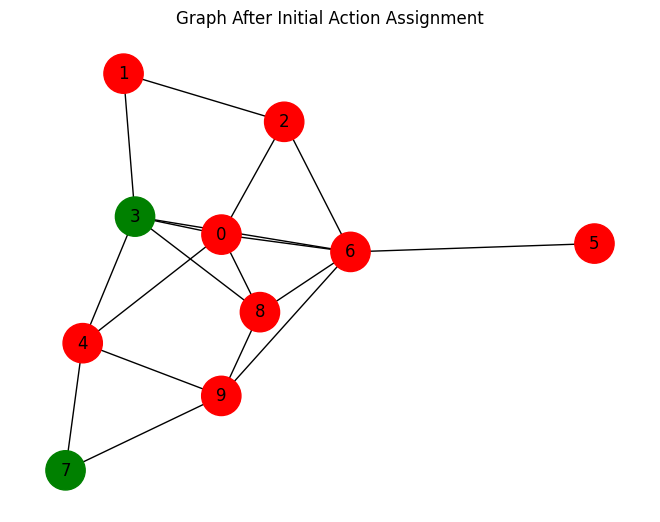

cascade incomplete


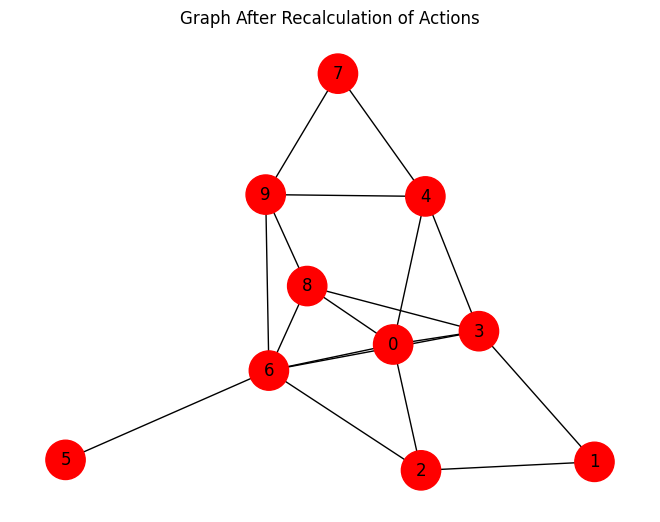

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

def set_all_to_B(G):
    # Set default action to 'B' for all nodes
    for node in G.nodes():
        G.nodes[node]['action'] = 'B'

def set_A(G, list1):
    # Set action to 'A' for nodes specified in list1
    for each in list1:
        if each in G.nodes():  # Check if the node exists in the graph
            G.nodes[each]['action'] = 'A'
        else:
            print(f"Node {each} not found in the graph.")  # Notify if node is missing

def get_colors(G):
    # Assign colors based on action
    colors = []
    for each in G.nodes():
        if 'action' in G.nodes[each] and G.nodes[each]['action'] == 'A':
            colors.append('green')  # Color for action 'A'
        else:
            colors.append('red')  # Color for action 'B'
    return colors

def find_neigh(each, c, G):
    num = 0
    for neighbor in G.neighbors(each):
        if G.nodes[neighbor]['action'] == c:
            num += 1
    return num

def recalculate_options(G):
    dict1 = {}
    # Payoff values
    a = 4
    b = 3

    for each in G.nodes():
        num_A = find_neigh(each, 'A', G)
        num_B = find_neigh(each, 'B', G)
        payoff_A = a * num_A
        payoff_B = b * num_B
        if payoff_A >= payoff_B:
            dict1[each] = 'A'
        else:
            dict1[each] = 'B'
    return dict1

def reset_node_attributes(G, action_dict):
    for each in action_dict:
        G.nodes[each]['action'] = action_dict[each]

def terminate_1(c,G):
    f=1
    for each in G.nodes():
        if G.nodes[each]['action'] != c:
            f=0
            break
    return f

def terminate(G, count):
    flag1 = terminate_1('A',G)
    flag2 = terminate_1('B',G)
    if flag1==1 or flag2==1 or count>=100:
        return 1

# Load the graph from a GML file
G = nx.read_gml('random_graph.gml')

# Print the nodes to check if they exist
print("Nodes in the graph:", list(G.nodes()))

# Set all nodes to action 'B'
set_all_to_B(G)

# Specify nodes to set action 'A'
list1 = ['3', '7']  # Use integers if the node IDs are integers
set_A(G, list1)

# Get the colors based on actions and draw the graph
colors = get_colors(G)
nx.draw(G, node_color=colors, node_size=800, with_labels=True)
plt.title("Graph After Initial Action Assignment")
plt.show()



flag = 0
count = 0 
while(1):
    flag = terminate(G,count)
    if flag == 1:
        break
    count += 1
    # Recalculate options based on neighbor actions
    action_dict = recalculate_options(G)

    # Reset node actions based on new options
    reset_node_attributes(G, action_dict)

    # Get the colors based on new actions and draw the updated graph
    colors = get_colors(G)

c = terminate_1('A',G)
if c==1:
    print('cascade complete')
else:
    print('cascade incomplete')
nx.draw(G, node_color=colors, node_size=800, with_labels=True)
plt.title("Graph After Recalculation of Actions")
plt.show()


Lecture 98 - Coding the Second Big Idea - Key People

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

def set_all_to_B(G):
    # Set default action to 'B' for all nodes
    for node in G.nodes():
        G.nodes[node]['action'] = 'B'

def set_A(G, list1):
    # Set action to 'A' for nodes specified in list1
    for each in list1:
        if each in G.nodes():  # Check if the node exists in the graph
            G.nodes[each]['action'] = 'A'
        else:
            print(f"Node {each} not found in the graph.")  # Notify if node is missing

def get_colors(G):
    # Assign colors based on action
    colors = []
    for each in G.nodes():
        if 'action' in G.nodes[each] and G.nodes[each]['action'] == 'A':
            colors.append('green')  # Color for action 'A'
        else:
            colors.append('red')  # Color for action 'B'
    return colors

def find_neigh(each, c, G):
    num = 0
    for neighbor in G.neighbors(each):
        if G.nodes[neighbor]['action'] == c:
            num += 1
    return num

def recalculate_options(G):
    dict1 = {}
    # Payoff values
    a = 9
    b = 5

    for each in G.nodes():
        num_A = find_neigh(each, 'A', G)
        num_B = find_neigh(each, 'B', G)
        payoff_A = a * num_A
        payoff_B = b * num_B
        if payoff_A >= payoff_B:
            dict1[each] = 'A'
        else:
            dict1[each] = 'B'
    return dict1

def reset_node_attributes(G, action_dict):
    for each in action_dict:
        G.nodes[each]['action'] = action_dict[each]

def terminate_1(c,G):
    f=1
    for each in G.nodes():
        if G.nodes[each]['action'] != c:
            f=0
            break
    return f

def terminate(G, count):
    flag1 = terminate_1('A',G)
    flag2 = terminate_1('B',G)
    if flag1==1 or flag2==1 or count>=100:
        return 1

G = nx.read_gml('random_graph.gml')

# Print the nodes to check if they exist
print("Nodes in the graph:", list(G.nodes()))

for u in G.nodes():
    for v in G.nodes():
        if u<v:
            print(u,v,':')
            list1=[]
            list1.append(u)
            list1.append(v)

            # Set all nodes to action 'B'
            set_all_to_B(G)

            # Specify nodes to set action 'A'
            list1 = ['3', '7']  

            set_A(G, list1)

            # Get the colors based on actions and draw the graph
            colors = get_colors(G)

            # nx.draw(G, node_color=colors, node_size=800, with_labels=True)
            # plt.title("Graph After Initial Action Assignment")
            # plt.show()



            flag = 0
            count = 0 
            while(1):
                flag = terminate(G,count)
                if flag == 1:
                    break
                count += 1
                # Recalculate options based on neighbor actions
                action_dict = recalculate_options(G)

                # Reset node actions based on new options
                reset_node_attributes(G, action_dict)

                # Get the colors based on new actions and draw the updated graph
                colors = get_colors(G)

            c = terminate_1('A',G)
            if c==1:
                print('cascade complete')
            else:
                print('cascade incomplete')
            # nx.draw(G, node_color=colors, node_size=800, with_labels=True)
            # plt.title("Graph After Recalculation of Actions")
            # plt.show()


Nodes in the graph: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
0 1 :
cascade incomplete
0 2 :
cascade incomplete
0 3 :
cascade incomplete
0 4 :
cascade incomplete
0 5 :
cascade incomplete
0 6 :
cascade incomplete
0 7 :
cascade incomplete
0 8 :
cascade incomplete
0 9 :
cascade incomplete
1 2 :
cascade incomplete
1 3 :
cascade incomplete
1 4 :
cascade incomplete
1 5 :
cascade incomplete
1 6 :
cascade incomplete
1 7 :
cascade incomplete
1 8 :
cascade incomplete
1 9 :
cascade incomplete
2 3 :
cascade incomplete
2 4 :
cascade incomplete
2 5 :
cascade incomplete
2 6 :
cascade incomplete
2 7 :
cascade incomplete
2 8 :
cascade incomplete
2 9 :
cascade incomplete
3 4 :
cascade incomplete
3 5 :
cascade incomplete
3 6 :
cascade incomplete
3 7 :
cascade incomplete
3 8 :
cascade incomplete
3 9 :
cascade incomplete
4 5 :
cascade incomplete
4 6 :
cascade incomplete
4 7 :
cascade incomplete
4 8 :
cascade incomplete
4 9 :
cascade incomplete
5 6 :
cascade incomplete
5 7 :
cascade incomplete
5 8 

Lecture 99 - Coding the Third Big Idea- Impact of Communities on Cascades

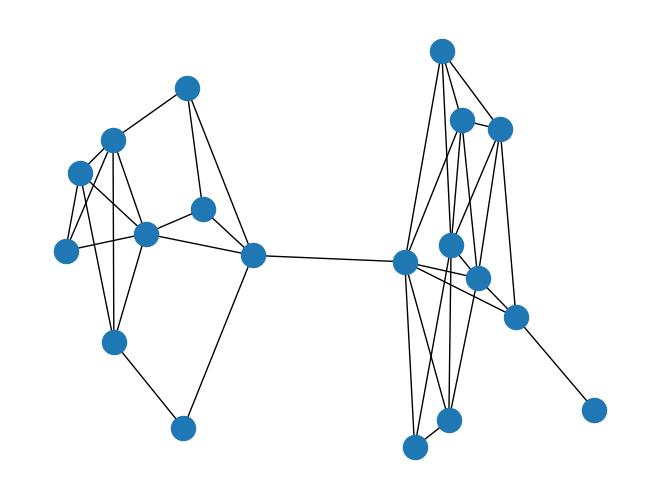

In [17]:
import networkx as nx
import random
import matplotlib.pyplot as plt


def create_first_community(G):
    for i in range(0,10):
        G.add_node(i)
    for i in range(0,10):
        for j in range(0,10):
            if i<j:
                r=random.uniform(0,1)
                if r<0.5:
                    G.add_edge(i,j)

def create_second_community(G):
    for i in range(11,20):
        G.add_node(i)
    for i in range(11,20):
        for j in range(11,20):
            if i<j:
                r=random.uniform(0,1)
                if r<0.5:
                    G.add_edge(i,j)

G=nx.Graph()
create_first_community(G)
create_second_community(G)
G.add_edge(5,15)

nx.draw(G)
plt.show()

nx.write_gml(G,'random_graph_community.gml')


Nodes in the graph: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '11', '12', '13', '14', '15', '16', '17', '18', '19']
0 1 :


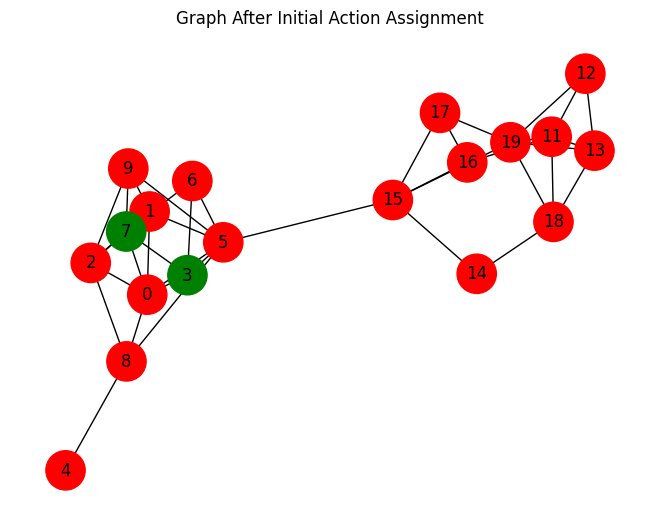

cascade incomplete


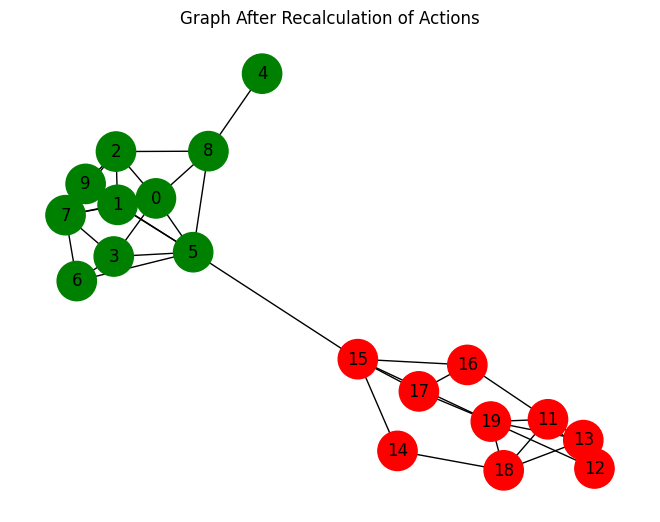

0 2 :


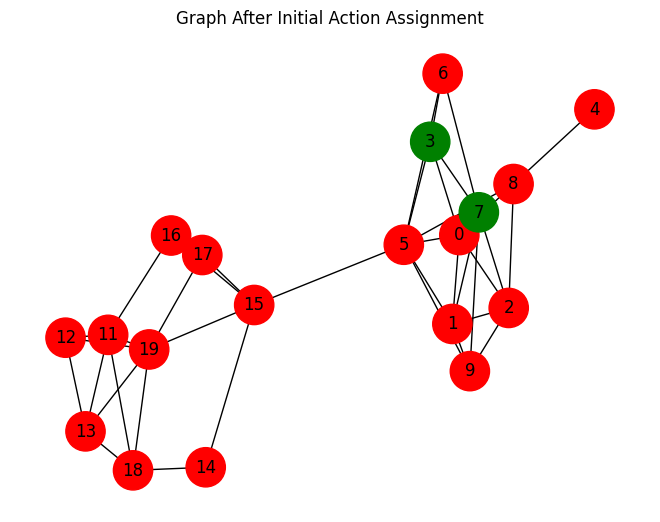

cascade incomplete


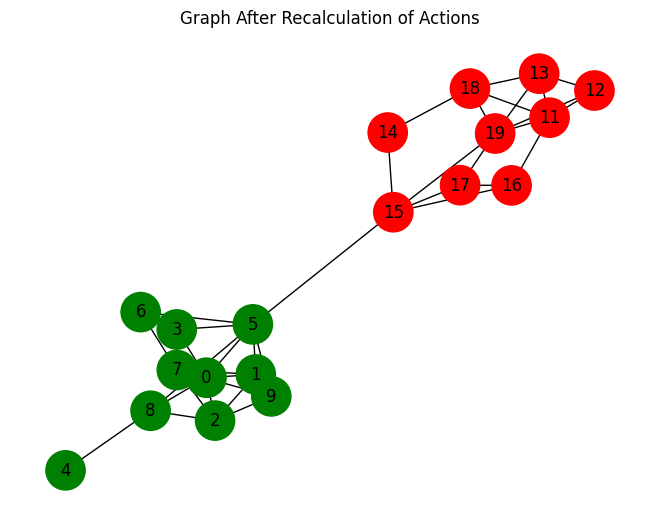

0 3 :


KeyboardInterrupt: 

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

def set_all_to_B(G):
    # Set default action to 'B' for all nodes
    for node in G.nodes():
        G.nodes[node]['action'] = 'B'

def set_A(G, list1):
    # Set action to 'A' for nodes specified in list1
    for each in list1:
        if each in G.nodes():  # Check if the node exists in the graph
            G.nodes[each]['action'] = 'A'
        else:
            print(f"Node {each} not found in the graph.")  # Notify if node is missing

def get_colors(G):
    # Assign colors based on action
    colors = []
    for each in G.nodes():
        if 'action' in G.nodes[each] and G.nodes[each]['action'] == 'A':
            colors.append('green')  # Color for action 'A'
        else:
            colors.append('red')  # Color for action 'B'
    return colors

def find_neigh(each, c, G):
    num = 0
    for neighbor in G.neighbors(each):
        if G.nodes[neighbor]['action'] == c:
            num += 1
    return num

def recalculate_options(G):
    dict1 = {}
    # Payoff values
    a = 15
    b = 5

    for each in G.nodes():
        num_A = find_neigh(each, 'A', G)
        num_B = find_neigh(each, 'B', G)
        payoff_A = a * num_A
        payoff_B = b * num_B
        if payoff_A >= payoff_B:
            dict1[each] = 'A'
        else:
            dict1[each] = 'B'
    return dict1

def reset_node_attributes(G, action_dict):
    for each in action_dict:
        G.nodes[each]['action'] = action_dict[each]

def terminate_1(c,G):
    f=1
    for each in G.nodes():
        if G.nodes[each]['action'] != c:
            f=0
            break
    return f

def terminate(G, count):
    flag1 = terminate_1('A',G)
    flag2 = terminate_1('B',G)
    if flag1==1 or flag2==1 or count>=100:
        return 1

G = nx.read_gml('random_graph_community.gml')

# Print the nodes to check if they exist
print("Nodes in the graph:", list(G.nodes()))

for u in G.nodes():
    for v in G.nodes():
        if u<v:
            print(u,v,':')
            list1=[]
            list1.append(u)
            list1.append(v)

            # Set all nodes to action 'B'
            set_all_to_B(G)

            # Specify nodes to set action 'A'
            list1 = ['3', '7']  

            set_A(G, list1)

            # Get the colors based on actions and draw the graph
            colors = get_colors(G)

            nx.draw(G, node_color=colors, node_size=800, with_labels=True)
            plt.title("Graph After Initial Action Assignment")
            plt.show()



            flag = 0
            count = 0 
            while(1):
                flag = terminate(G,count)
                if flag == 1:
                    break
                count += 1
                # Recalculate options based on neighbor actions
                action_dict = recalculate_options(G)

                # Reset node actions based on new options
                reset_node_attributes(G, action_dict)

                # Get the colors based on new actions and draw the updated graph
                colors = get_colors(G)

            c = terminate_1('A',G)
            if c==1:
                print('cascade complete')
            else:
                print('cascade incomplete')
            nx.draw(G, node_color=colors, node_size=800, with_labels=True)
            plt.title("Graph After Recalculation of Actions")
            plt.show()


Lecture 100 - Coding the Fourth Big Idea - Cascades and Clusters

[0, 1, 2, 3]


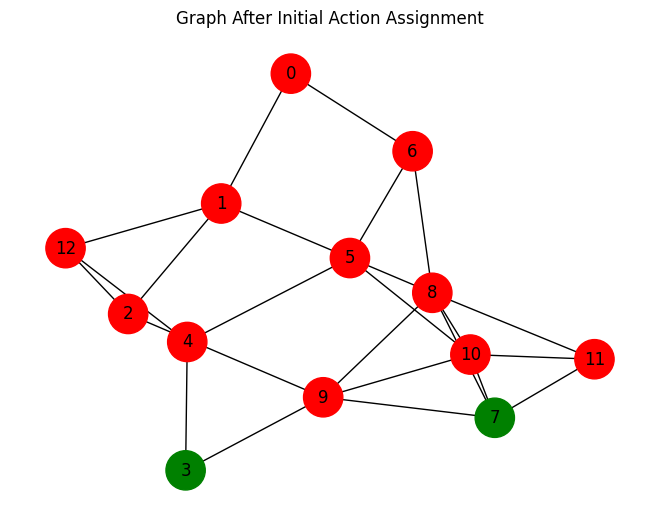

[0, 2, 3, 4]


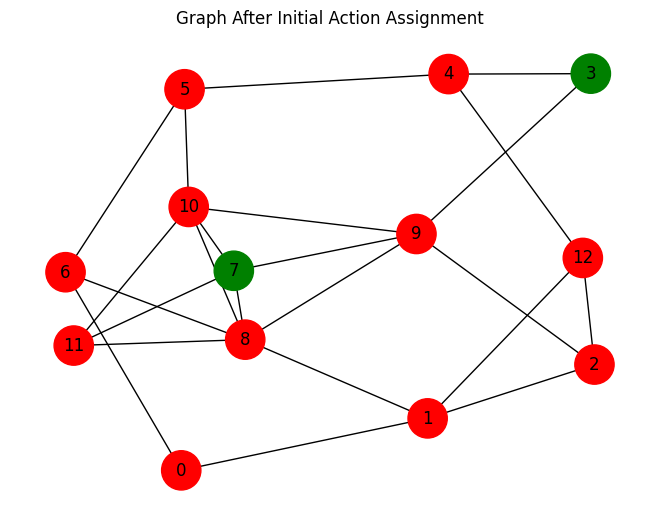

[1, 2, 3, 4]


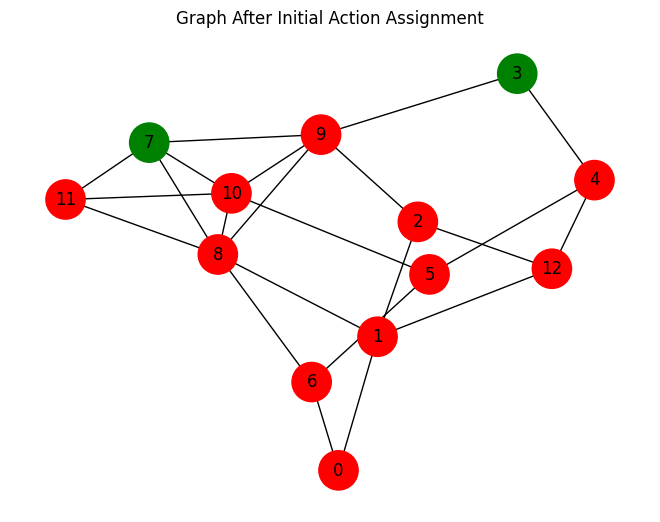

[2, 3, 4, 5]


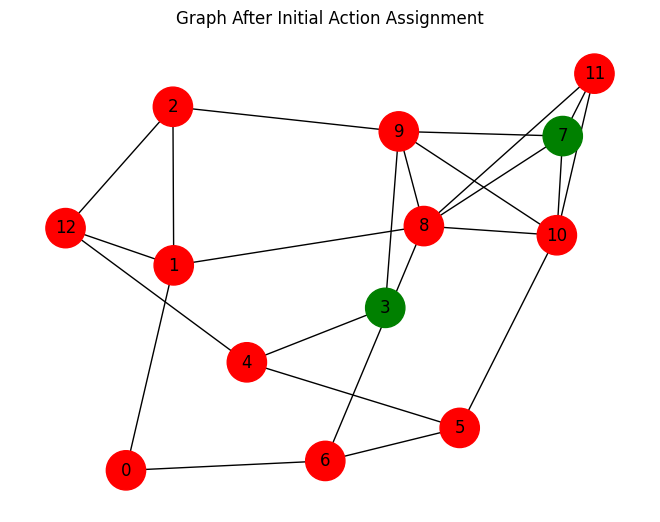

[3, 4, 5, 6]


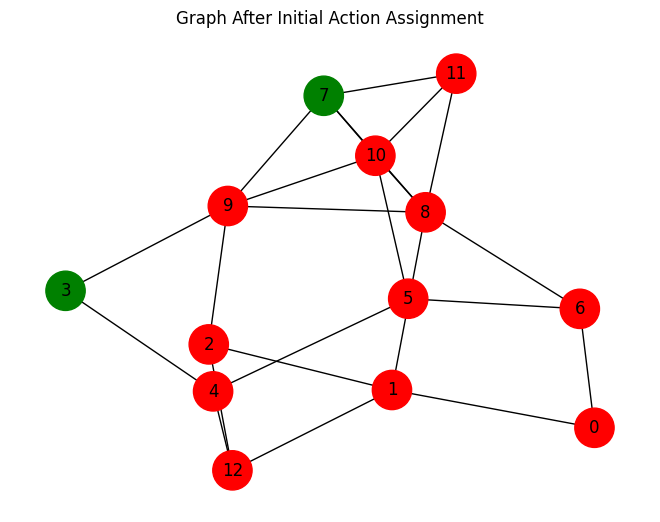

[4, 5, 6, 12]


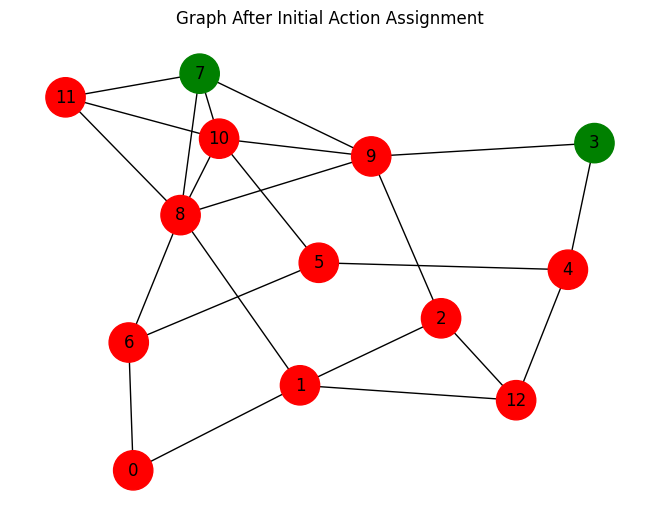

[2, 3, 4, 12]


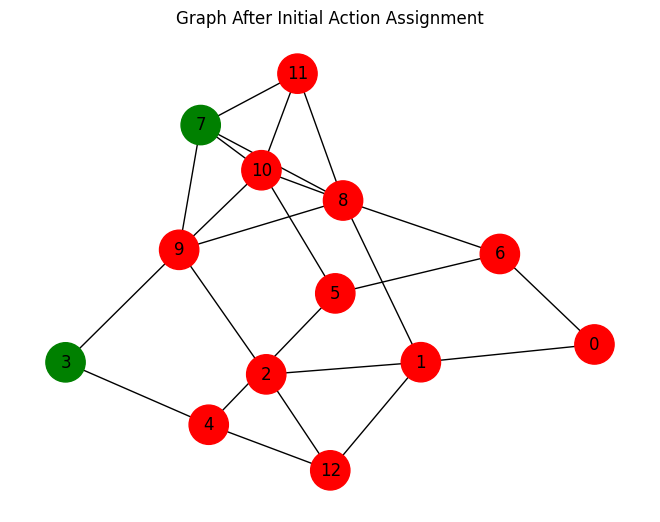

[0, 1, 2, 3, 4, 5]


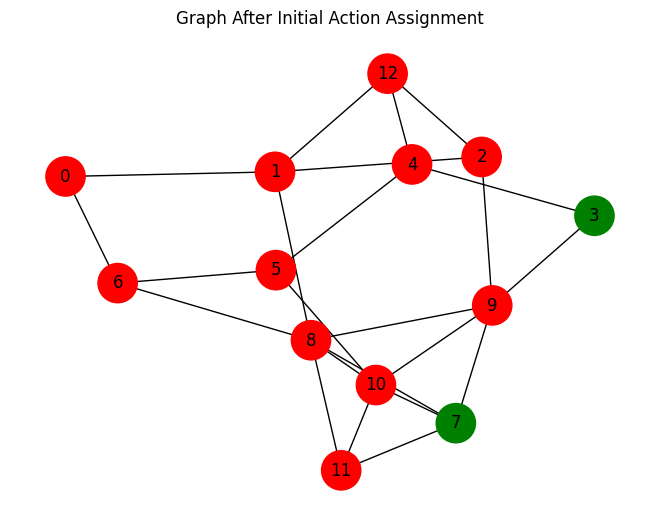

[0, 1, 2, 3, 4, 5, 6, 12]


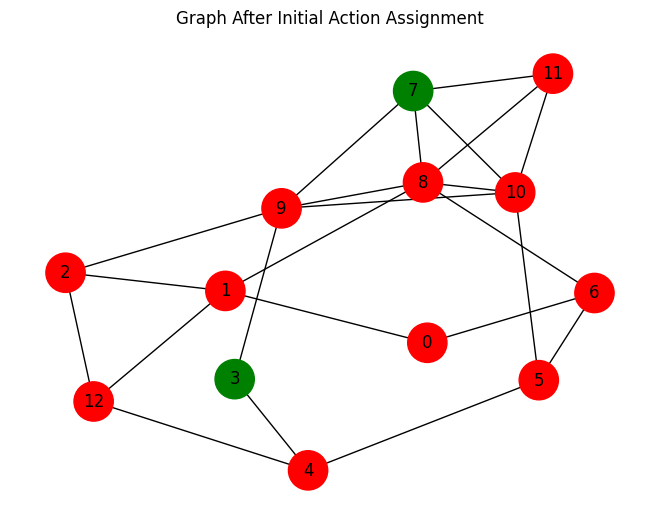

In [9]:
import networkx as nx
import random 
import matplotlib.pyplot as plt

def set_all_to_B(G):
    # Set default action to 'B' for all nodes
    for node in G.nodes():
        G.nodes[node]['action'] = 'B'

def set_A(G, list1):
    # Set action to 'A' for nodes specified in list1
    for each in list1:
        if each in G.nodes():  # Check if the node exists in the graph
            G.nodes[each]['action'] = 'A'
        else:
            print(f"Node {each} not found in the graph.")  # Notify if node is missing

def get_colors(G):
    # Assign colors based on action
    colors = []
    for each in G.nodes():
        if 'action' in G.nodes[each] and G.nodes[each]['action'] == 'A':
            colors.append('green')  # Color for action 'A'
        else:
            colors.append('red')  # Color for action 'B'
    return colors

def find_neigh(each, c, G):
    num = 0
    for neighbor in G.neighbors(each):
        if G.nodes[neighbor]['action'] == c:
            num += 1
    return num

def recalculate_options(G):
    dict1 = {}
    # Payoff values
    a = 3
    b = 2

    for each in G.nodes():
        num_A = find_neigh(each, 'A', G)
        num_B = find_neigh(each, 'B', G)
        payoff_A = a * num_A
        payoff_B = b * num_B
        if payoff_A >= payoff_B:
            dict1[each] = 'A'
        else:
            dict1[each] = 'B'
    return dict1

def reset_node_attributes(G, action_dict):
    for each in action_dict:
        G.nodes[each]['action'] = action_dict[each]

def terminate_1(c,G):
    f=1
    for each in G.nodes():
        if G.nodes[each]['action'] != c:
            f=0
            break
    return f

def terminate(G, count):
    flag1 = terminate_1('A',G)
    flag2 = terminate_1('B',G)
    if flag1==1 or flag2==1 or count>=100:
        return 1
    
G=nx.Graph()

G.add_edges_from([(0,1), (0,6), (1,2), (1,8), (1,12), (2,9), (2,12), (3,4), (3,9), (4,5), (4,12), (5,6), (5,10), (6,8), (7,8), (7,9), (7,10), (7,11),(8,9), (8,10), (8,11), (9,10), (10,11)])


list2=[[0,1,2,3],[0,2,3,4],[1,2,3,4],[2,3,4,5],[3,4,5,6],[4,5,6,12],[2,3,4,12],[0,1,2,3,4,5],[0,1,2,3,4,5,6,12]]

for list1 in list2:
    print(list1)
    set_all_to_B(G)


    # Specify nodes to set action 'A'
    list1 = [3, 7]  

    set_A(G, list1)

    # Get the colors based on actions and draw the graph
    colors = get_colors(G)

    nx.draw(G, node_color=colors, node_size=800, with_labels=True)
    plt.title("Graph After Initial Action Assignment")
    plt.show()



while(1):
    flag = terminate(G,count)
    if flag == 1:
        break
    count += 1
    # Recalculate options based on neighbor actions
    action_dict = recalculate_options(G)

    # Reset node actions based on new options
    reset_node_attributes(G, action_dict)

    # Get the colors based on new actions and draw the updated graph
    colors = get_colors(G)

    c = terminate_1('A',G)
    if c==1:
        print('cascade complete')
    else:
        print('cascade incomplete')
    nx.draw(G, node_color=colors, node_size=800, with_labels=True)
    plt.title("Graph After Recalculation of Actions")
    plt.show()
